In [23]:
# A1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Loading the dataset
data_path = r"C:\Users\keert\Desktop\shrest\Toddler Autism dataset July 2018.csv"
df = pd.read_csv(data_path)

# Preprocessing: Encode categorical variables using one-hot encoding
X_encoded = pd.get_dummies(df.drop(columns=['Class/ASD Traits']))

# Target variable
y = df['Class/ASD Traits']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize kNN classifier
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

# Confusion matrix
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print("Confusion Matrix (Training Data):\n", conf_matrix_train)
print("\nConfusion Matrix (Test Data):\n", conf_matrix_test)

# Precision, recall, F1-score
report_train = classification_report(y_train, y_pred_train)
report_test = classification_report(y_test, y_pred_test)

print("\nClassification Report (Training Data):\n", report_train)
print("\nClassification Report (Test Data):\n", report_test)


Confusion Matrix (Training Data):
 [[142 115]
 [ 36 550]]

Confusion Matrix (Test Data):
 [[ 26  43]
 [ 12 130]]

Classification Report (Training Data):
               precision    recall  f1-score   support

          No       0.80      0.55      0.65       257
         Yes       0.83      0.94      0.88       586

    accuracy                           0.82       843
   macro avg       0.81      0.75      0.77       843
weighted avg       0.82      0.82      0.81       843


Classification Report (Test Data):
               precision    recall  f1-score   support

          No       0.68      0.38      0.49        69
         Yes       0.75      0.92      0.83       142

    accuracy                           0.74       211
   macro avg       0.72      0.65      0.66       211
weighted avg       0.73      0.74      0.71       211



In [24]:
# A2
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

file_path = r"C:\Users\keert\Downloads\Lab Session1 Data (2).xlsx"

df = pd.read_excel(file_path, sheet_name="Purchase data")

print("All Column Names:", df.columns)

actual_prices_column_name = 'Milk'
predicted_prices_column_name = 'Milk'

actual_prices = df[actual_prices_column_name].values
predicted_prices = df[predicted_prices_column_name].values

df_cleaned = df.dropna(subset=[actual_prices_column_name, predicted_prices_column_name])

actual_prices = df_cleaned[actual_prices_column_name].values
predicted_prices = df_cleaned[predicted_prices_column_name].values

print("Actual Values:", actual_prices)
print("Predicted Values:", predicted_prices)

mse = mean_squared_error(actual_prices, predicted_prices)

rmse = np.sqrt(mse)

mape = np.mean(np.abs((actual_prices - predicted_prices) / actual_prices)) * 100

if len(actual_prices) >= 2:
    r2 = r2_score(actual_prices, predicted_prices)
    print(f'R-squared (R2) score: {r2}')
else:
    print('Insufficient samples to calculate R-squared.')

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

All Column Names: Index(['Customer', 'Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)',
       'Payment (Rs)', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Candy', 'Mango', 'Milk'],
      dtype='object')
Actual Values: [18.]
Predicted Values: [18.]
Insufficient samples to calculate R-squared.
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
Mean Absolute Percentage Error (MAPE): 0.0


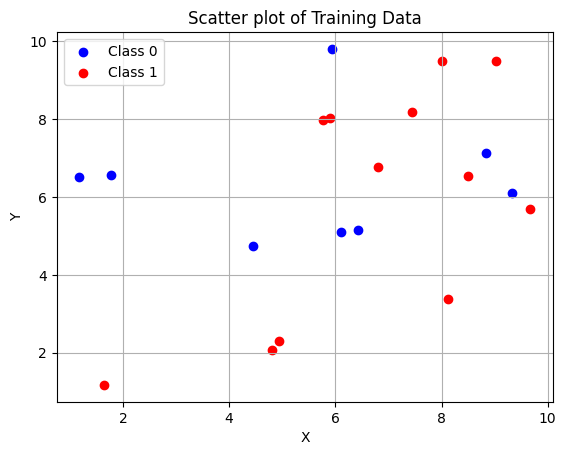

In [25]:
#A3
import numpy as np
import matplotlib.pyplot as plt

# Generating random training data
np.random.seed(0)  # for reproducibility
num_points = 20
X = np.random.uniform(1, 10, num_points)
Y = np.random.uniform(1, 10, num_points)
labels = np.random.choice([0, 1], num_points)

# Scatter plot of the training data
plt.scatter(X[labels == 0], Y[labels == 0], color='blue', label='Class 0')
plt.scatter(X[labels == 1], Y[labels == 1], color='red', label='Class 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of Training Data')
plt.legend()
plt.grid(True)
plt.show()


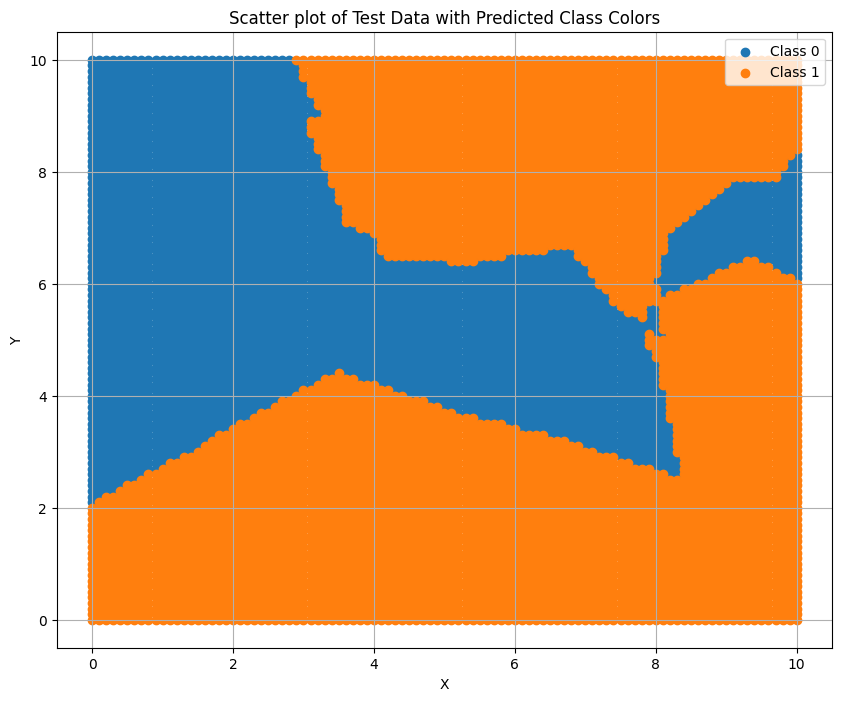

In [26]:
#A4
from sklearn.neighbors import KNeighborsClassifier

# Generating test set data
x_values = np.arange(0, 10.1, 0.1)
y_values = np.arange(0, 10.1, 0.1)
test_data = np.array([[x, y] for x in x_values for y in y_values])

# Using kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(np.column_stack((X, Y)), labels)
predicted_labels = knn.predict(test_data)

# Plotting test data with predicted class colors
plt.figure(figsize=(10, 8))
for label in np.unique(predicted_labels):
    indices = np.where(predicted_labels == label)
    plt.scatter(test_data[indices, 0], test_data[indices, 1], label=f'Class {label}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of Test Data with Predicted Class Colors')
plt.legend()
plt.grid(True)
plt.show()


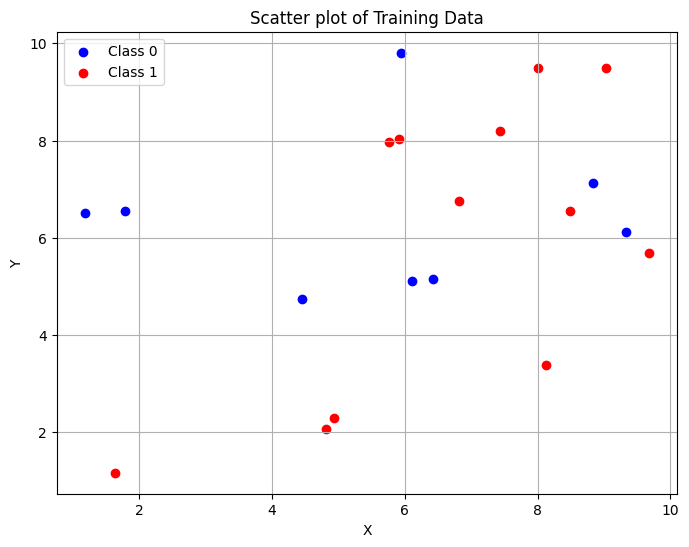

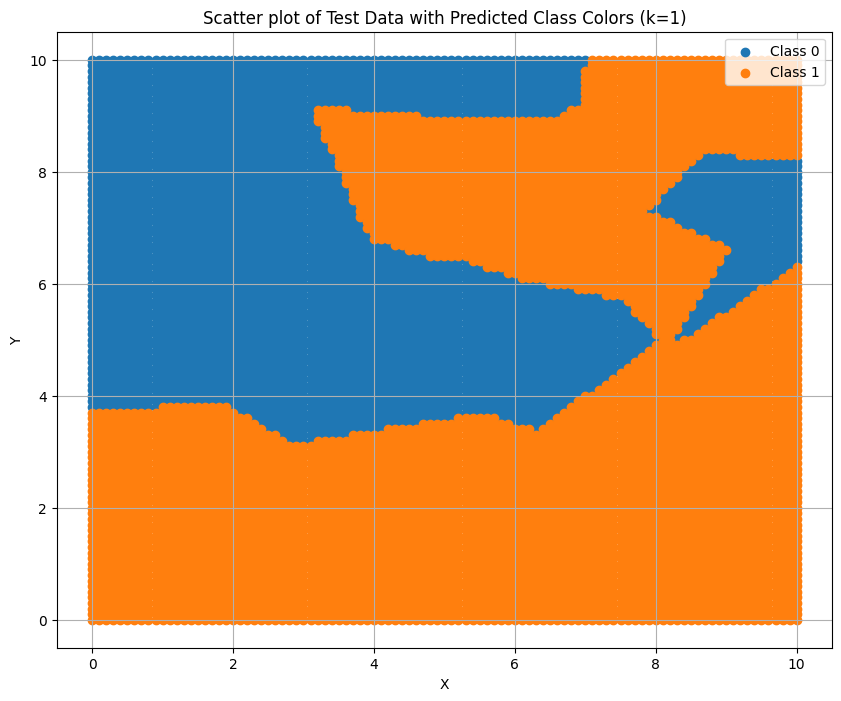

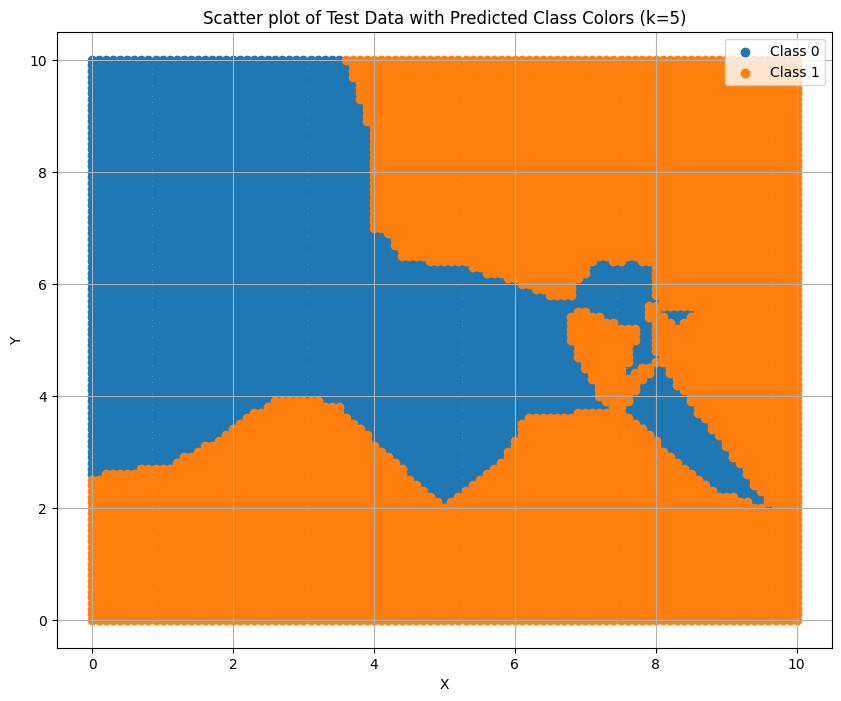

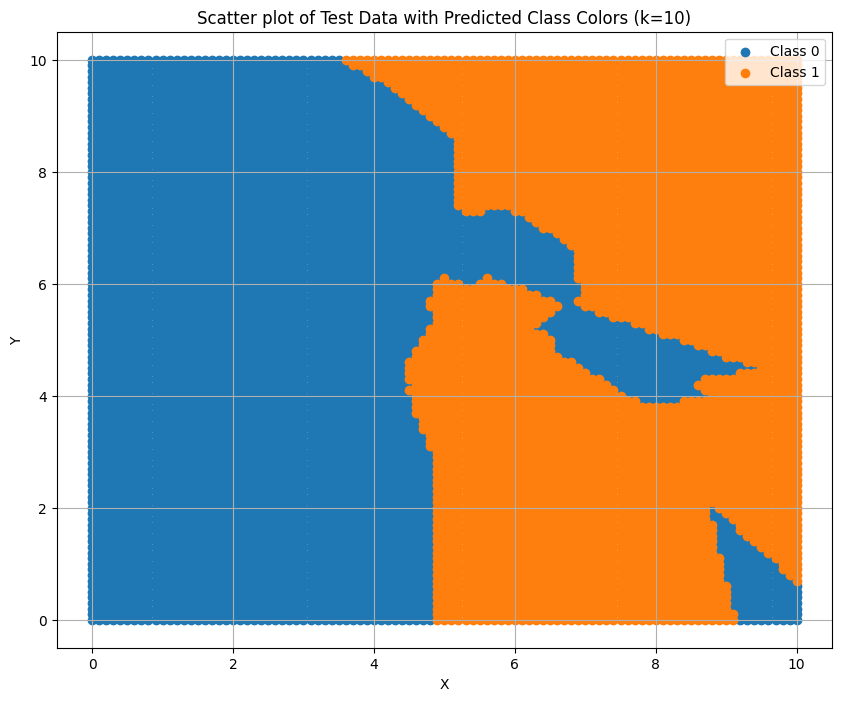

In [27]:
#A5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Generating random training data
np.random.seed(0)  # for reproducibility
num_points = 20
X = np.random.uniform(1, 10, num_points)
Y = np.random.uniform(1, 10, num_points)
labels = np.random.choice([0, 1], num_points)

# Scatter plot of the training data
plt.figure(figsize=(8, 6))
plt.scatter(X[labels == 0], Y[labels == 0], color='blue', label='Class 0')
plt.scatter(X[labels == 1], Y[labels == 1], color='red', label='Class 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of Training Data')
plt.legend()
plt.grid(True)
plt.show()

# Generating test set data
x_values = np.arange(0, 10.1, 0.1)
y_values = np.arange(0, 10.1, 0.1)
test_data = np.array([[x, y] for x in x_values for y in y_values])

# Iterate over different values of k
for k in [1, 5, 10]:
    # Using kNN classifier with current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(np.column_stack((X, Y)), labels)
    predicted_labels = knn.predict(test_data)

    # Plotting test data with predicted class colors for current k value
    plt.figure(figsize=(10, 8))
    for label in np.unique(predicted_labels):
        indices = np.where(predicted_labels == label)
        plt.scatter(test_data[indices, 0], test_data[indices, 1], label=f'Class {label}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Scatter plot of Test Data with Predicted Class Colors (k={k})')
    plt.legend()
    plt.grid(True)
    plt.show()


   Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score  \
0        1   0   0   0   0   0   0   1   1   0    1        28               3   
1        2   1   1   0   0   0   1   1   0   0    0        36               4   
2        3   1   0   0   0   0   0   1   1   0    1        36               4   
3        4   1   1   1   1   1   1   1   1   1    1        24              10   
4        5   1   1   0   1   1   1   1   1   1    1        20               9   

  Sex       Ethnicity Jaundice Family_mem_with_ASD Who completed the test  \
0   f  middle eastern      yes                  no          family member   
1   m  White European      yes                  no          family member   
2   m  middle eastern      yes                  no          family member   
3   m        Hispanic       no                  no          family member   
4   f  White European       no                 yes          family member   

  Class/ASD Traits  
0               No  
1       

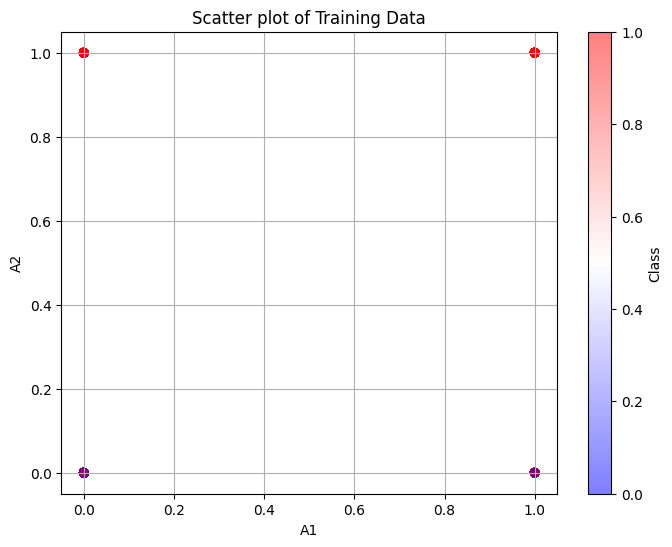

In [28]:
#A6
# A3
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\keert\Desktop\shrest\Toddler Autism dataset July 2018.csv"
df = pd.read_csv(file_path)

# Print the first few rows of the dataset
print(df.head())

# Extract A1 and A2 values from the dataset
A1_values = df['A1'].values
A2_values = df['A2'].values

# Extract class labels from the dataset
class_labels = df['Class/ASD Traits'].map({'No': 0, 'Yes': 1}).values

# Print the number of data points for each class
print("Number of data points for Class 0 (No):", (class_labels == 0).sum())
print("Number of data points for Class 1 (Yes):", (class_labels == 1).sum())

print("A1_values:", A1_values)
print("A2_values:", A2_values)
print("class_labels:", class_labels)

# Scatter plot of the training data
plt.figure(figsize=(8, 6))
plt.scatter(A1_values, A2_values, c=class_labels, cmap='bwr', alpha=0.5)
plt.xlabel('A1')
plt.ylabel('A2')
plt.title('Scatter plot of Training Data')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()


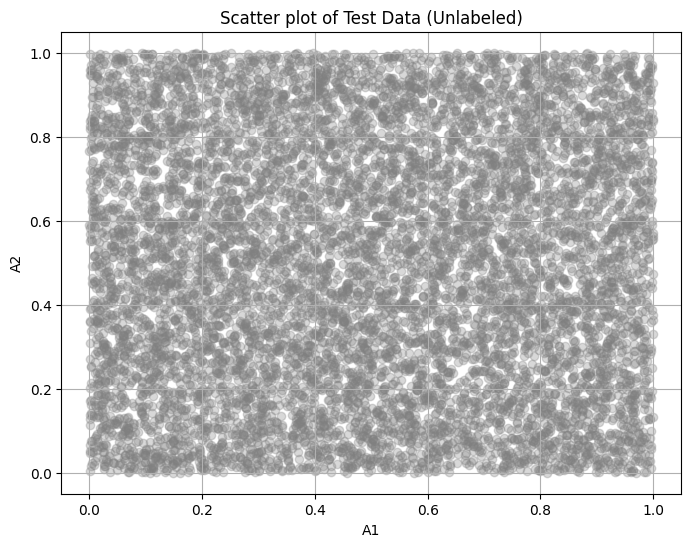

In [29]:
#A6
 # A4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\keert\Desktop\shrest\Toddler Autism dataset July 2018.csv"
df = pd.read_csv(file_path)

# Generate test set data with values of A1 and A2 varying between 0 and 1
num_test_points = 10000
A1_test_values = np.random.rand(num_test_points)
A2_test_values = np.random.rand(num_test_points)

# Plotting the test data (unlabeled)
plt.figure(figsize=(8, 6))
plt.scatter(A1_test_values, A2_test_values, color='gray', alpha=0.3)
plt.xlabel('A1')
plt.ylabel('A2')
plt.title('Scatter plot of Test Data (Unlabeled)')
plt.grid(True)
plt.show()


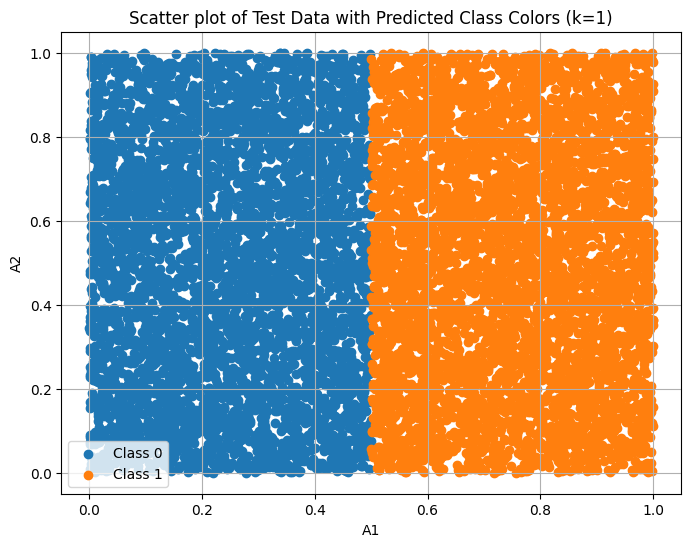

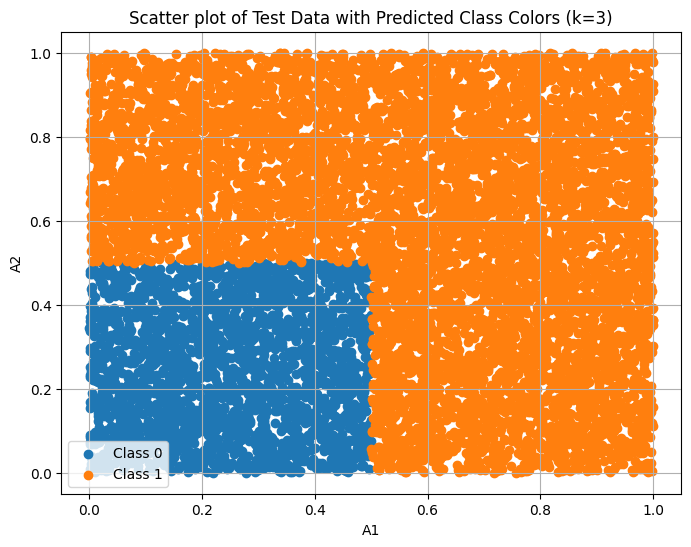

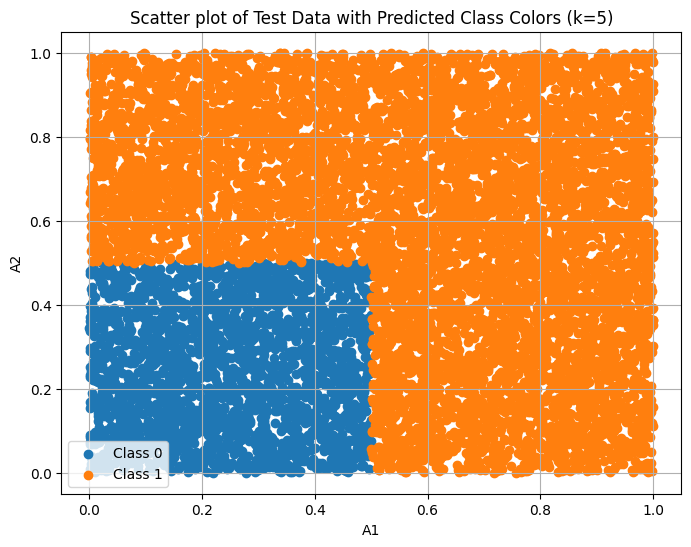

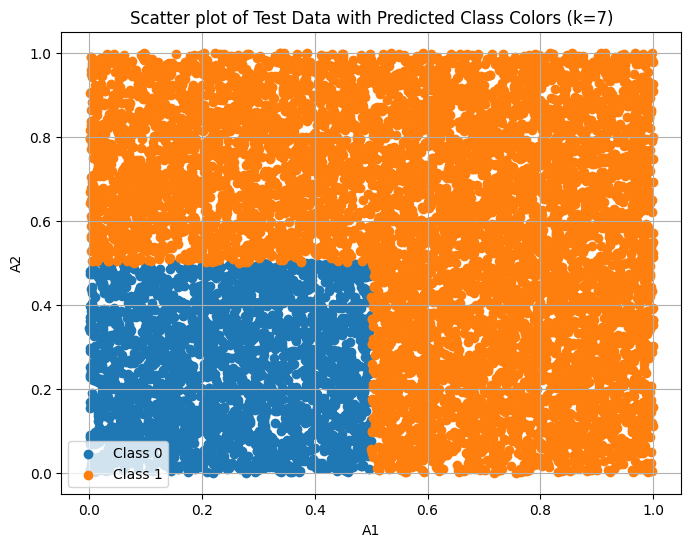

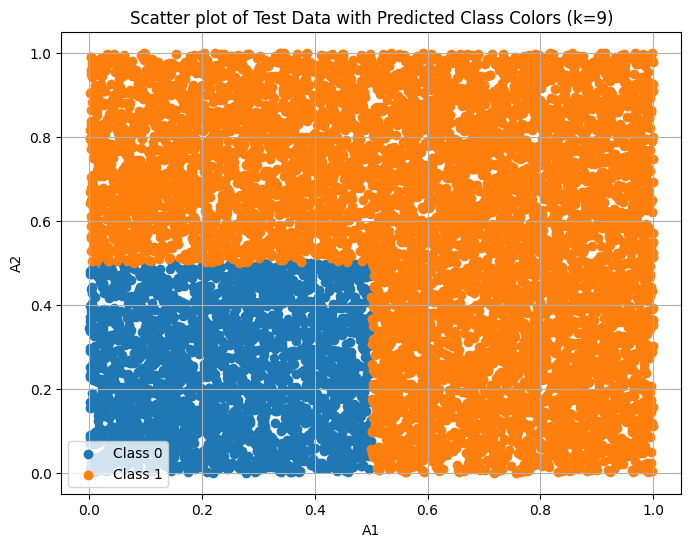

In [30]:
#A6
 # A5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
file_path = r"C:\Users\keert\Desktop\shrest\Toddler Autism dataset July 2018.csv"
df = pd.read_csv(file_path)

# Extract features (A1 and A2) and class labels
A1_values = df['A1'].values
A2_values = df['A2'].values
class_labels = df['Class/ASD Traits'].map({'No': 0, 'Yes': 1}).values

# Generate test set data with values of A1 and A2 varying between 0 and 1
num_test_points = 10000
A1_test_values = np.random.rand(num_test_points)
A2_test_values = np.random.rand(num_test_points)

# Define a range of values for k
k_values = [1, 3, 5, 7, 9]

# Iterate over different values of k
for k in k_values:
    # Initialize and train kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(np.column_stack((A1_values, A2_values)), class_labels)

    # Predict class labels for test data
    predicted_labels = knn.predict(np.column_stack((A1_test_values, A2_test_values)))

    # Plot test data with predicted class colors for current k value
    plt.figure(figsize=(8, 6))
    for label in np.unique(predicted_labels):
        indices = np.where(predicted_labels == label)
        plt.scatter(A1_test_values[indices], A2_test_values[indices], label=f'Class {label}')
    plt.xlabel('A1')
    plt.ylabel('A2')
    plt.title(f'Scatter plot of Test Data with Predicted Class Colors (k={k})')
    plt.legend()
    plt.grid(True)
    plt.show()


In [31]:
#A7
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}  # Define the range of 'k' values to search

# Initialize the kNN classifier
knn = KNeighborsClassifier()

# Perform Grid Search CV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(np.column_stack((A1_values, A2_values)), class_labels)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'n_neighbors': 7}
Best Accuracy: 0.763768900925299
